In [9]:
from scipy.io.wavfile import read as wav_read
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
import math
import subprocess as sp

%matplotlib inline

In [ ]:
cnt = 100

In [10]:
from warnings import warn

In [11]:
def run_ps(*args):
    sp.run(args, check=True)

In [12]:
def show(ys):
    ts = np.arange(ys.shape[0])
    plt.figure(figsize=(15, 6))
    plt.plot(ts, ys)

In [30]:
def get_pitch(wave, pos):
    # print(wave.shape, pos)
    wave = wave[pos:]
    wave = wave[:int(length / cnt * rate)]
    # wave = np.hamming(wave.shape[0]) * wave
    
    nwave = np.zeros(shape=wave.shape[0] * 2)
    nwave[:wave.shape[0]] = wave
    window = np.flipud(nwave)
    
    corr = ifft(fft(nwave) * fft(window)).real
    n = corr.shape[0]
    corr = np.roll(corr, n)[:n]
    
    # show(corr)
    # plt.show()
    
    corr = corr[:corr.shape[0] // 2]
    diff = np.diff(corr)
    maxs = np.argwhere(np.logical_and(diff[:-1] > 0, diff[1:] < 0)).squeeze()
    maxs = maxs[np.argwhere(corr[maxs] > 0.95 * corr[maxs].max()).squeeze()]
    # print(maxs)
    if len(maxs.shape) == 0:
        ind = int(maxs)
    else:
        ind = maxs[0]
    
    # print(ind)
    if ind == 1:
        show(corr)
    return rate / (ind + 2), rate / (ind if ind != 0 else 1)

In [14]:
def determine(left, right):
    base = 440
    i1 = math.log(left / base) / math.log(2) * 12
    i2 = math.log(right / base) / math.log(2) * 12
    i1 = math.ceil(i1)
    i2 = math.floor(i2)
    if i1 == i2:
        return i1
    else:
        warn("choose between {}, {}".format(i1, i2))
        return i1

In [15]:
from tqdm import tqdm

In [31]:
rate, wave = wav_read('./rec_notes/katusha_long.wav')
length = wave.shape[0] / rate
res = []
for pos in np.arange(0, length - 1 / cnt, 1 / cnt):
    pitch = get_pitch(wave, int(pos * rate))
    det = determine(*pitch)
    # print(pitch, det)
    res.append(det)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: UserWarning: choose between 7, 6
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: UserWarning: choose between -33, -34
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: UserWarning: choose between -34, -35
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: UserWarning: choose between 23, 24
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: UserWarning: choose between 6, 5
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: UserWarning: choose between -21, -22
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:10: UserWarni

In [32]:
len(res)

2315

In [33]:
from scipy.signal import spectrogram

In [34]:
def show_results(wave, rate, predict):
    predict = np.asanyarray(predict)
    wave = np.asanyarray(wave)
    fs, ts, sxx = spectrogram(wave, rate, nperseg=4096 * 2, noverlap=4096 * 2 * 7 // 8)
    plt.figure(figsize=(15, 6))
    plt.pcolormesh(ts, fs[:256], np.log(sxx[:256, :]))
    plt.plot(np.arange(0, len(predict) / cnt, 1 / cnt), 440 * 2 ** (predict / 12), color='black')
    plt.ylim(0, 4096 / 4)

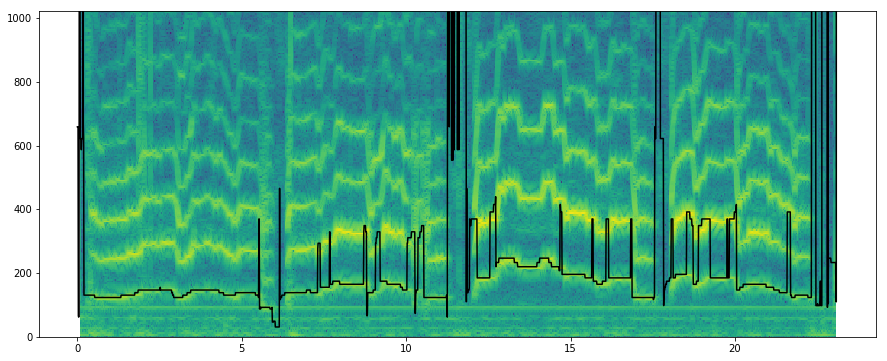

In [35]:
show_results(wave, rate, res)

In [21]:
res

[25,
 25,
 25,
 25,
 25,
 25,
 25,
 25,
 47,
 47,
 47,
 47,
 49,
 56,
 56,
 56,
 56,
 56,
 61,
 -20,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 -19,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 61,
 -16,
 -16,
 -16,
 -16,
 -16,
 -16,
 -16,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -4,
 -16,
 -16,
 -16

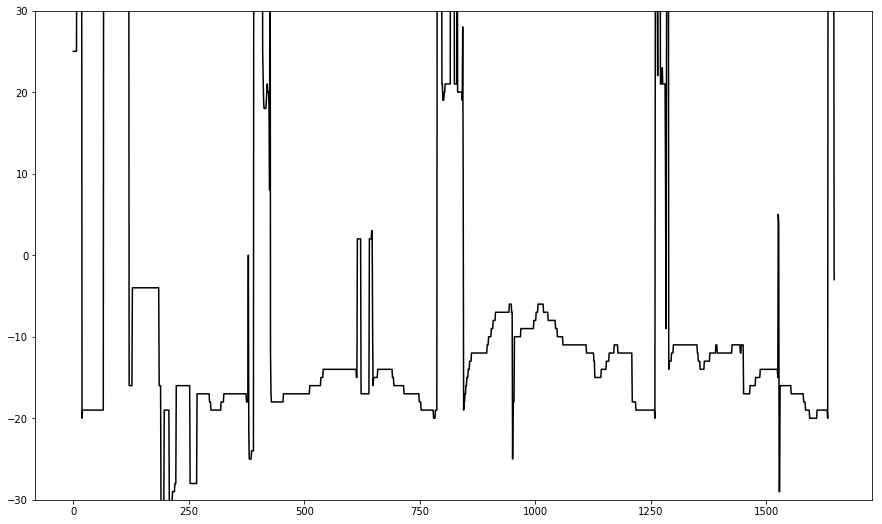

In [26]:
plt.figure(figsize=(15, 9))
plt.plot(np.arange(0, len(res)), res, color='black')
plt.ylim(-30, 30)
plt.show()